In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
#from pydub import AudioSegment
import IPython.display as ipd
import numpy as np
import tensorflow_io as tfio

In [2]:
folderpath = 'D:\python_practise_deeplearning\Kaggle_bird\Data\\train_audio'
def read_file_names(folderpath):
    train_location = {}
    test_location = {}
    label_map = {}
    directories = os.listdir(folderpath)
    count = 0
    label_count = 0
    for directory in directories:
        label_map[directory] = label_count
        
        file_paths = []
        path = os.path.join(folderpath, directory)
        files = os.listdir(path)
        length = len(files)
        file_count = 0
        for file in files:
            if file_count <= int(0.8*length):
                train_location[os.path.join(path,file)] = str(label_count)
                file_count+=1
            else:
                test_location[os.path.join(path,file)] = str(label_count)
                file_count+=1
        
        count+=1
        label_count+=1
        if count == 2:
            break
    return train_location, test_location, label_map
train_location, test_location, label_map = read_file_names(folderpath)
#print(train_location, test_location, label_map)

In [6]:
def convert_to_numpy(data, data2):
    data = tf.convert_to_tensor(data, dtype=tf.float32)
    if data.shape[1] == 2:
        data = np.delete(data, 1, 1) #To convert a 2 channel audio to single channel
    data = np.transpose(data)
    #length = data.shape[1]
    print(data.shape)
    data = np.append(data, [[int(data2)]], axis = 1)
    print('check',str(data.shape))
    return data
window_size = 100000
train_dataset = tf.data.Dataset.from_tensor_slices(list(train_location.items()))

train_dataset_1 = train_dataset.map(lambda path: (tf.py_function(func = convert_to_numpy, inp = [tfio.audio.decode_mp3(tf.io.read_file(path[0])), path[1]], Tout = tf.float32)))#.window(window_size , drop_remainder=True)#.batch(1).prefetch(1)
train_dataset_1 = train_dataset_1.window(window_size+1, shift = window_size, drop_remainder = True)
train_dataset_1 = train_dataset_1.flat_map(lambda window: window.batch(window_size))
train_dataset_1 = train_dataset_1.batch(1)
train_dataset_1 = train_dataset_1.map(lambda windows: (windows[:,:-1], windows[:, 1:]))
#train_dataset_3 = train_dataset_2.flat_map(lambda window,y: [window.batch(window_size),y])

#train_dataset_5 = train_dataset_4.map(lambda windows: (window[0], window[1]))

#train_dataset_2 = train_dataset.map(lambda content: [tf.py_function(func = convert_to_numpy, inp = [content[0]], Tout = tf.float32), content[1]])#.batch(1).prefetch(1)
#train_dataset_2 = train_dataset.map(lambda content: [np.array(content[0]), content[1]])
#train_dataset = train_dataset.batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices(list(test_location.items()))
test_dataset_1 = test_dataset.map(lambda path: [tf.py_function(func = convert_to_numpy, inp = [tfio.audio.decode_mp3(tf.io.read_file(path[0]))], Tout = tf.float32), int(path[1])])#.batch(1).prefetch(1)
#test_dataset_2 = test_dataset.map(lambda content: [tf.py_function(func = convert_to_numpy, inp = [content[0]]), content[1]])#batch(1).prefetch(1)
#test_dataset = test_dataset.batch(8)
#test_dataset_2 = test_dataset.map(lambda content: [, content[1]])
#test_labels_ds = tf.data.Dataset.from_tensor_slices(list(test_location.values()))

In [16]:
#train_dataset_2 = train_dataset_1.map(lambda X_batch, Y_batch: (X_batch, Y_batch))

In [7]:
for x,y in train_dataset_1.take(1):
        print('start')
        print(type(x))
        print(type(y))
        x=x
        y=y
        print('finish')

(1, 1223424)
check (1, 1223425)
(1, 1601280)
check (1, 1601281)
(1, 1730304)
check (1, 1730305)
(1, 1481472)
check (1, 1481473)
(1, 1588608)
check (1, 1588609)
(1, 343296)
check (1, 343297)
(1, 2002176)
check (1, 2002177)
(1, 3140352)
check (1, 3140353)
(1, 1157760)
check (1, 1157761)
(1, 2597760)
check (1, 2597761)
(1, 12941568)
check (1, 12941569)
(1, 1376764)
check (1, 1376765)
(1, 854784)
check (1, 854785)
(1, 438912)
check (1, 438913)
(1, 1282176)
check (1, 1282177)
(1, 612864)
check (1, 612865)
(1, 734976)
check (1, 734977)
(1, 13921920)
check (1, 13921921)
(1, 2048256)
check (1, 2048257)
(1, 3724416)
check (1, 3724417)
(1, 6539904)
check (1, 6539905)
(1, 1162368)
check (1, 1162369)
(1, 1001088)
check (1, 1001089)
(1, 2824704)
check (1, 2824705)
(1, 2717568)
check (1, 2717569)
(1, 1050483)
check (1, 1050484)
(1, 612864)
check (1, 612865)
(1, 762624)
check (1, 762625)
(1, 1375488)
check (1, 1375489)
(1, 1704960)
check (1, 1704961)
(1, 3496320)
check (1, 3496321)
(1, 3801600)
check

In [9]:
print(x)

NameError: name 'x' is not defined

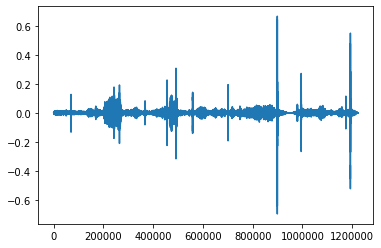

In [10]:
plt.plot(np.transpose(x))

In [25]:
print(x)

<_VariantDataset shapes: <unknown>, types: tf.float32>


()
(1223424, 1)
0
tf.Tensor(
[[-1.8714356e-05]
 [-3.5982066e-05]
 [-6.8542504e-06]
 [ 1.5355869e-05]
 [ 8.6702858e-06]
 [ 8.6513919e-06]
 [ 6.0153616e-07]
 [-1.8943038e-05]
 [-2.5209856e-05]
 [-8.9550376e-06]], shape=(10, 1), dtype=float32)


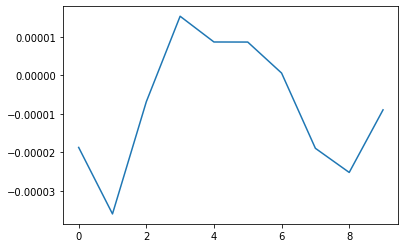

()
(1601280, 2)
0
tf.Tensor(
[[ 2.8677925e-04 -2.6358006e-04]
 [ 2.4632152e-04 -3.0441902e-04]
 [-7.7243068e-04 -1.3233477e-03]
 [-1.2522211e-04 -6.7607110e-04]
 [ 2.1361691e-04 -3.3692433e-04]
 [-1.9127561e-05 -5.6912849e-04]
 [ 6.2030862e-04  7.1085495e-05]
 [ 3.4048292e-04 -2.0773389e-04]
 [ 6.4617641e-05 -4.8234686e-04]
 [ 9.7657077e-04  4.3110258e-04]], shape=(10, 2), dtype=float32)


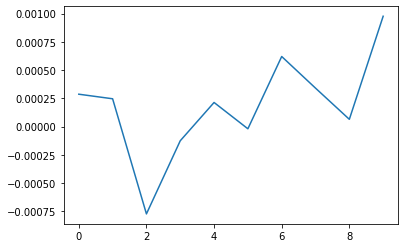

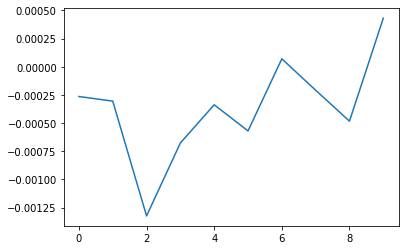

In [38]:
for x in train_dataset.take(2):
    data = tf.io.read_file(x[0])
    print(data.shape)
    data = tfio.audio.decode_mp3(data)
    print(data.shape)
    print(int(x[1]))
    print(data[1000:1010])
    plt.plot(data[1000:1010,0])
    plt.show()
    if data.shape[1] == 2:
        plt.plot(data[1000:1010,1])
        plt.show()

In [34]:
for x in train_dataset_1.take(2):
    print(type(x))
    print(x.shape)
    print(y)
    plt.plot(np.transpose(x))
    plt.show()

<class 'tuple'>


AttributeError: 'tuple' object has no attribute 'shape'

In [41]:
for x in train_dataset_2.take(1):
    
    print(type(x))
    print(x.shape)
    

In [16]:
bla = np.array([[1,2,3,4]])
print(bla.shape)

(1, 4)


In [5]:
for element in train_dataset_1.take(1):
    data = element
    print(type(element))
#     print(type(element[1]))
#     print(element[1])
#     #data = np.array(element[0])
#     #print(type(data))
#     print(type(element[0]))
#     #print(data.shape)
#     print('passed')
#     plt.plot(element[0])
#     plt.show()
    

<class 'tuple'>


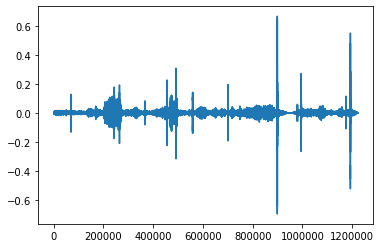

In [14]:
plt.plot(data[0][0])

In [18]:
train_file_path_ds_1 = train_file_path_ds.map(lambda path:tf.io.read_file(path[0]))
train_file_path_ds_2 = train_file_path_ds_1.map(lambda content: tfio.audio.decode_mp3(content))

check_iterator


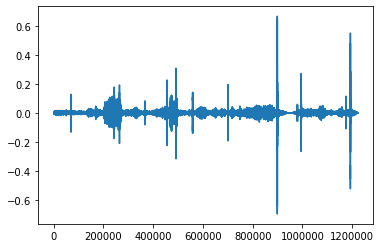

check_iterator


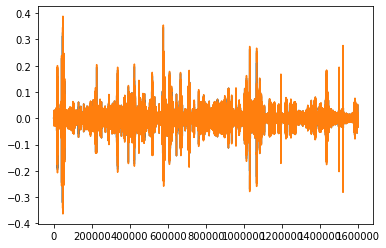

In [19]:
for element in train_file_path_ds_2.take(2):
    print('check_iterator')
    data = np.array(element)
    plt.plot(data)
    plt.show()

In [40]:
audio = decode_mp3('D:\\python_practise_deeplearning\\Kaggle_bird\\Data\\train_audio\\aldfly\\XC135454.mp3')

check
D:\python_practise_deeplearning\Kaggle_bird\Data\train_audio\aldfly\XC135454.mp3


In [24]:
for i in range(4):
    print(data[i][1])

0.0
-1.3002589e-10
-1.5905838e-10
-1.2013135e-10


In [21]:
print(data.shape)

(1601280, 2)


check_iterator


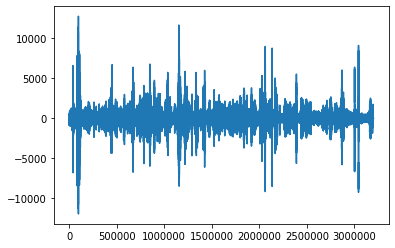

In [43]:
print('check_iterator')
data = np.array(audio)
plt.plot(audio)
plt.show()

In [12]:
ipd.Audio('D:\\python_practise_deeplearning\\Kaggle_bird\\Data\\train_audio\\aldfly\\XC135454.mp3')

In [ ]:
for element in train_dataset_1.take(1):
    

In [20]:
model = tf.keras.Sequential([
    
    tf.keras.layers.SimpleRNN(1, input_shape = [None,1]),
    tf.keras.layers.Dense(1, activation = 'relu')
    ])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [21]:
history = model.fit(train_dataset_1 , epochs = 1, workers = 32)

ValueError: in user code:

    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:531 train_step  **
        y_pred = self(x, training=True)
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\Saransh agrawal\Anaconda_installation\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:168 assert_input_compatibility
        layer_name + ' is incompatible with the layer: '

    ValueError: Input 0 of layer sequential is incompatible with the layer: its rank is undefined, but the layer requires a defined rank.


In [5]:
for element in train_dataset_1.take(1):
    data = element
    print(len(data))


2


In [7]:
data[0].shape

TensorShape([1, 1223424, 1])

In [8]:
data_new = np.resize(data[0], [1,400,1])

In [11]:
data_new.shape

(1, 400, 1)

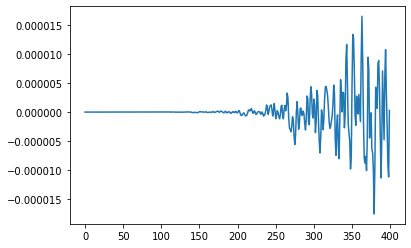

In [16]:
plt.plot(data_new[0])

In [27]:
data[0].shape

TensorShape([1223424, 1])